# Analyses of multiple large populations using SAMPLED DATA

In [1]:
import pickle
import gzip
import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [4]:
%%time

# SELECTION = 0.1 POPULATIONS
prefix = '../../Simulations/Ensemble-simulations/saved_simulations/large-selection_0p1-1000_MultiSim/'
selection_0p1 = []

for i in tqdm(range(1000)):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    selection_0p1.append(data)
print(len(selection_0p1))
print(type(selection_0p1[0]))

100%|██████████| 1000/1000 [02:44<00:00,  6.08it/s]

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 1min 49s, sys: 47.2 s, total: 2min 37s
Wall time: 2min 44s


In [5]:
selection_0p1[0].head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color
Clone ID,,,,,,,,,
A,0,0.001,30611084,116402657,1.000000,0,54855,1.000000,"(0, 0, 0)"
A.0,12,0.001,1154223,1166297,0.010020,1,1860,1.217008,"(20, 19, 178)"
A.1,13,0.001,0,0,0.000000,1,0,0.611267,"(24, 145, 50)"
A.2,13,0.001,0,0,0.000000,1,0,1.128175,"(138, 236, 32)"
A.3,13,0.001,40915,41170,0.000354,1,65,1.018221,"(109, 252, 88)"


## Sample data

In [6]:
sample_size=10**6
detection_limit=100

In [7]:
%%time
for i in tqdm(range(len(selection_0p1))):
    selection_0p1[i] = sample(selection_0p1[i], sample_size, detection_limit)
print(len(selection_0p1))

100%|██████████| 1000/1000 [44:43<00:00,  2.68s/it]

1000
CPU times: user 43min 19s, sys: 52.1 s, total: 44min 11s
Wall time: 44min 43s


In [8]:
selection_0p1[0].head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A,0,0.001,30611084,116402657,1.000000,0,54855,1.000000,"(0, 0, 0)",264107,1000000,1.000000
A.0,12,0.001,1154223,1166297,0.010020,1,1860,1.217008,"(20, 19, 178)",9785,9839,0.009839
A.3,13,0.001,40915,41170,0.000354,1,65,1.018221,"(109, 252, 88)",325,325,0.000325
A.4,13,0.001,1402,1408,0.000012,1,5,0.681611,"(30, 252, 36)",12,12,0.000012
A.5,15,0.001,30562,30633,0.000263,1,47,1.355794,"(45, 217, 47)",271,271,0.000271


## Maximum allele frequencies

In [9]:
%%time
selection_0p1_MaxAFs = get_max_AFs(selection_0p1, sampled=True)

CPU times: user 1.92 s, sys: 569 ms, total: 2.49 s
Wall time: 2.6 s


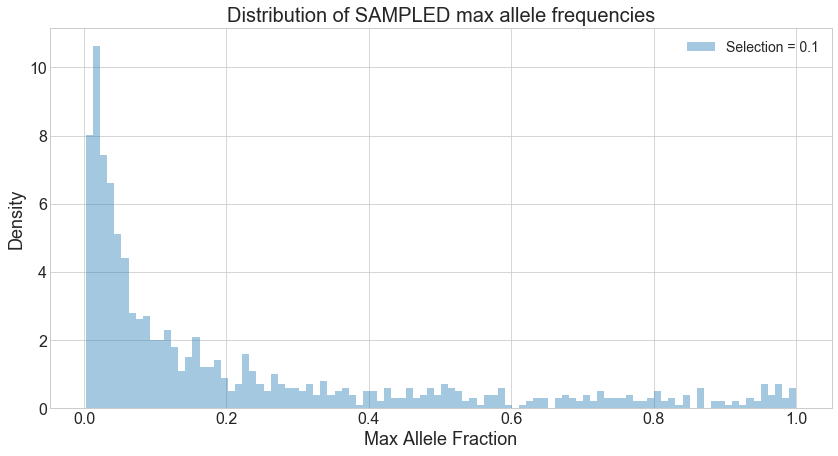

In [10]:
sns.distplot(selection_0p1_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection = 0.1");
plt.title('Distribution of SAMPLED max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p1-MaxAFs.png')
plt.show()

## Heterogeneity

In [11]:
%%time
selection_0p1_H = get_heterogeneity(selection_0p1, sampled=True)

CPU times: user 1.27 s, sys: 17.9 ms, total: 1.29 s
Wall time: 1.3 s


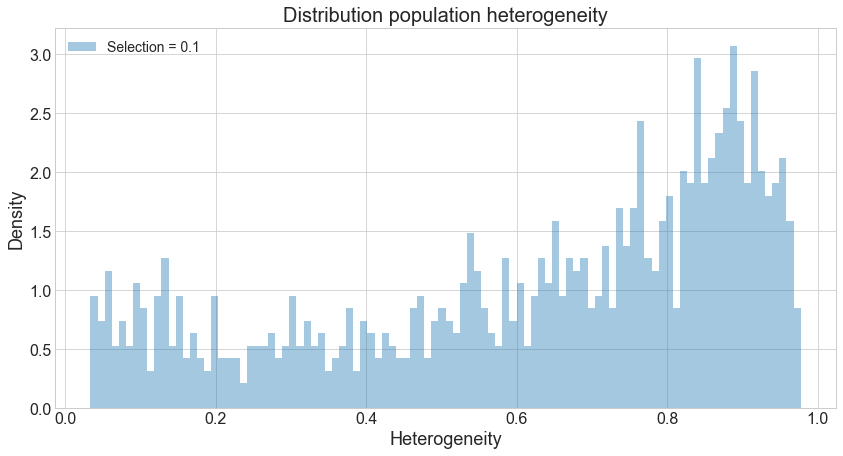

In [12]:
sns.distplot(selection_0p1_H, bins=100, norm_hist=True, kde=False, label="Selection = 0.1");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p1-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [13]:
%%time
selection_0p1_mut_distr = get_mutation_distributions(selection_0p1, sampled=True)

CPU times: user 1min 3s, sys: 622 ms, total: 1min 4s
Wall time: 1min 5s


In [14]:
selection_0p1_mut_distr.to_csv('../Analysis-Data/SAMPLED-Large-1000_sim-selection_0p1_mut_distr.csv')

In [15]:
selection_0p1_avg_nmd = selection_0p1_mut_distr.mean()
selection_0p1_std_nmd = selection_0p1_mut_distr.std()

In [16]:
%%time
selection_0p1_avg_num_mut = avg_num_mutations(selection_0p1_avg_nmd)

CPU times: user 606 µs, sys: 54 µs, total: 660 µs
Wall time: 629 µs


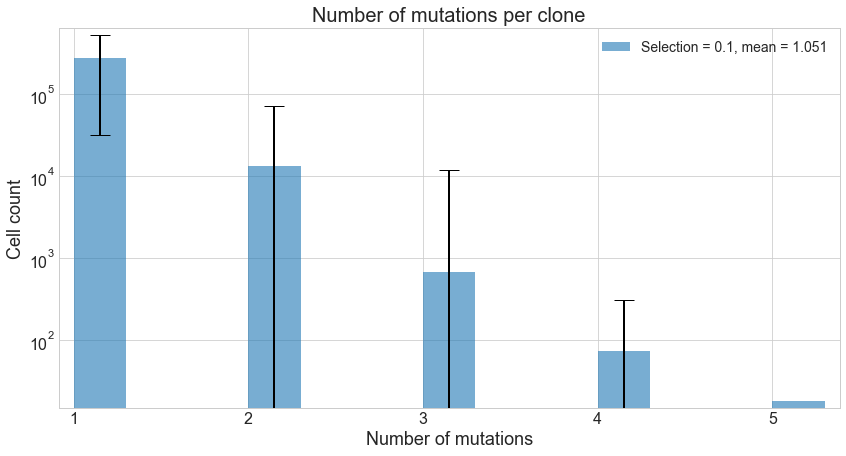

In [17]:
selection_0p1_errors = selection_0p1_std_nmd.values

plt.bar(left=selection_0p1_avg_nmd.index+0.15, height=selection_0p1_avg_nmd.values, width=0.3, alpha=0.6, 
        align='center', yerr=selection_0p1_errors, capsize=10, 
        label="Selection = 0.1, mean = %s" %(round(selection_0p1_avg_num_mut, 3)));

plt.title("Number of mutations per clone");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(selection_0p1_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p1-Num_mutations.png')
plt.show()

## Total number of mutations

In [18]:
%%time
selection_0p1_total_m = get_total_mutations(selection_0p1, det_lim=1)

CPU times: user 899 ms, sys: 13.3 ms, total: 912 ms
Wall time: 917 ms


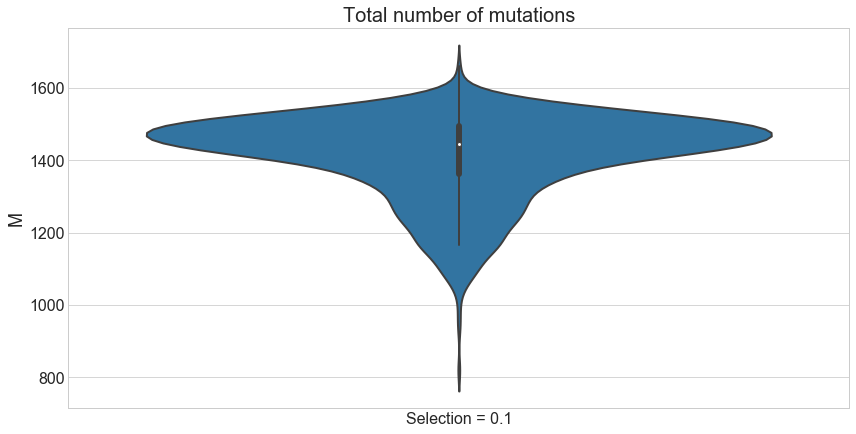

In [19]:
sns.violinplot(data=[selection_0p1_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Selection = 0.1"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p1-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [20]:
alpha = 0.3

In [21]:
%%time
selection_0p1_rec_errors = get_reconstruction_errors(selection_0p1, alpha, sampled=True)

CPU times: user 2min 6s, sys: 607 ms, total: 2min 6s
Wall time: 2min 7s


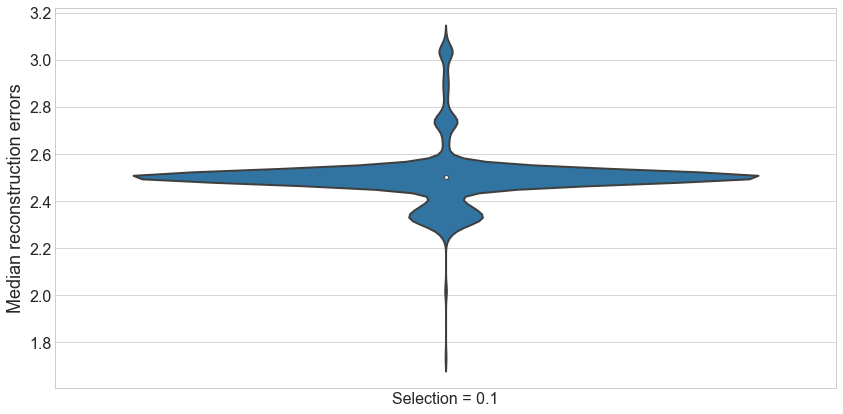

In [22]:
sns.violinplot(data=[selection_0p1_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Selection = 0.1"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p1-Rec_errors.png')
plt.show()

## Export data

In [23]:
d = pd.DataFrame()
d["selection_0p1_MaxAFs"] = selection_0p1_MaxAFs
d["selection_0p1_H"] = selection_0p1_H
d["selection_0p1_total_m"] = selection_0p1_total_m
d["selection_0p1_rec_errors"] = selection_0p1_rec_errors

d.to_csv('../Analysis-Data/SAMPLED-Large-selection_0p1-1000_sim-Analyzed_data.csv')